<a href="https://colab.research.google.com/github/Roberto014/Anal-tica-de-datos-y-herramientas-de-inteligencia-artificial-II/blob/main/Act%203.5%20Regresi%C3%B3n%20Lineal%20Simple%20y%20M%C3%BAltiple/Act_3_5_Regresi%C3%B3n_Lineal_Simple_y_M%C3%BAltiple__Filtro3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("Datos_limpios (4).csv")

In [ ]:
df.head(5)

,Unnamed: 0,last_scraped,source,name,host_name,host_since,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,...,beds,price,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
0,0,2024-06-28,city scrape,City SkyLine View from 1 Bedroom Apt in CDMX,Marco,2013-01-21,"['email', 'phone']",t,t,Cuauhtémoc,...,2.0,1652.0,4.95,4.93,4.95,4.93,4.96,4.93,4.91,0.41
1,1,2024-06-27,city scrape,Villa Dante,Dici,2010-06-28,"['email', 'phone', 'work_email']",t,t,Cuajimalpa de Morelos,...,1.0,3663.0,4.80,4.80,4.80,4.80,4.80,4.80,4.70,1.70
2,2,2024-06-28,city scrape,CONDESA HAUS B&B,Fernando,2010-08-09,"['email', 'phone', 'work_email']",t,t,Cuauhtémoc,...,1.9,1477.0,4.58,4.56,4.70,4.87,4.78,4.98,4.48,0.42
3,3,2024-06-28,city scrape,15 blocks from Paseo de la Reforma,Martina,2013-01-09,"['email', 'phone']",t,t,Miguel Hidalgo,...,3.0,814.0,4.75,4.83,4.72,4.84,4.93,4.46,4.75,1.19
4,4,2024-06-28,city scrape,"2 bedroom apt. deco bldg, Condesa",Nicholas,2011-01-04,"['email', 'phone']",t,t,Cuauhtémoc,...,2.0,1923.0,4.90,4.81,4.75,4.94,4.92,4.98,4.91,0.32


In [ ]:
filtro3 = df[df["room_type"] == "Shared room"]
filtro3

,Unnamed: 0,last_scraped,source,name,host_name,host_since,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,...,beds,price,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
104,104,2024-06-28,previous scrape,Apt near Mexico City's downtown,Andoni,2012-07-26,"['email', 'phone']",t,f,Cuauhtémoc,...,1.9,1477.0,4.80,4.80,4.80,4.80,4.80,4.80,4.70,1.70
255,255,2024-06-28,city scrape,cuarto con terraza y uso general,Jordi,2014-05-30,"['email', 'phone']",t,t,Cuauhtémoc,...,2.0,640.0,4.80,4.80,4.80,4.80,4.80,4.80,4.70,1.70
353,353,2024-06-27,city scrape,Gay UNAM Room,Andre,2015-02-05,"['email', 'phone', 'work_email']",t,t,Coyoacán,...,3.0,275.0,5.00,4.90,4.70,4.90,5.00,4.70,4.80,0.10
376,376,2024-06-28,city scrape,メキシコシティの革命記念塔付近のホステルです。,Tetsuo,2015-02-22,"['email', 'phone']",t,t,Cuauhtémoc,...,1.9,275.0,4.48,4.81,4.55,4.74,4.74,4.71,4.65,0.28
452,452,2024-06-28,city scrape,Nova House,Antonio,2015-04-17,"['email', 'phone', 'work_email']",t,t,Venustiano Carranza,...,1.9,550.0,4.85,4.84,4.93,4.94,4.91,4.69,4.93,0.77
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26227,26227,2024-06-28,city scrape,Habitacion compartida en condesa,Soledad,2021-12-31,"['email', 'phone']",t,t,Cuauhtémoc,...,6.0,188.0,4.80,4.80,4.80,4.80,4.80,4.80,4.70,1.70
26294,26294,2024-06-27,city scrape,ideal para eventos cercanos.,Laura,2023-10-15,['phone'],t,t,Iztacalco,...,1.0,311.0,5.00,4.80,4.80,4.80,4.80,4.80,4.70,1.00
26351,26351,2024-06-28,city scrape,Hostal mujeres,Zamaira,2016-10-25,"['email', 'phone']",t,t,Benito Juárez,...,6.0,210.0,4.80,4.80,4.80,4.80,4.80,4.80,4.70,1.70
26405,26405,2024-06-28,city scrape,Habitación colonia Juárez,Julio,2016-08-30,"['email', 'phone']",t,t,Cuauhtémoc,...,1.0,320.0,4.00,4.80,4.80,4.80,4.80,4.80,4.70,1.00


In [ ]:
Vars_indep = filtro3[['host_response_rate']]
Vars_dep = filtro3['host_acceptance_rate']

In [ ]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [ ]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [ ]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_indep, y=Vars_dep)
#Ya encontro la mejor ecuacion con la sumatoria del error cuadratico menor

LinearRegression()

In [ ]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__


{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_response_rate'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([1.14891935]),
 'rank_': 1,
 'singular_': array([147.95821696]),
 'intercept_': -22.3144048931607}

In [ ]:
#Predecimos los valores del total de accidentes a partir de la variable "alcohol"
#y_pred = model.predcit(X=df[['alcohol', 'speeding']])
y_pred = model.predict(X=filtro3[['host_response_rate']])
y_pred
#Toma cada registro del alcohol y esta prediciendo el valor total de accidentes

array([86.02868994, 86.02868994, 86.02868994, 92.57753024, 92.57753024,
       86.02868994, 67.30130451, 86.02868994, 92.57753024, 86.02868994,
       92.57753024, 67.30130451, 86.02868994, 92.57753024, 86.02868994,
       69.59914322, 69.59914322, 86.02868994, 92.57753024, 92.57753024,
       86.02868994, 86.02868994, 86.02868994, 86.02868994, 86.02868994,
       86.02868994, 92.57753024, 86.02868994, 86.02868994, 92.57753024,
       86.02868994, 86.02868994, 86.02868994, 86.02868994, 86.02868994,
       92.57753024, 92.57753024, 92.57753024, 92.57753024, 86.02868994,
       86.02868994, 84.53509478, 84.53509478, 84.53509478, 84.53509478,
       84.53509478, 92.57753024, 92.57753024, 84.53509478, 92.57753024,
       83.38617543, 84.53509478, 84.53509478, 81.08833673, 81.08833673,
       84.53509478, 86.02868994, 86.02868994, 86.02868994, 86.02868994,
       86.02868994, 86.02868994, 92.57753024, 92.57753024, 92.57753024,
       86.02868994, 92.57753024, 92.57753024, 86.02868994, 92.57

In [ ]:
#Insertamos la columna de predicciones en el Dataframe
filtro3.insert(0, 'predicciones', y_pred)

#

<Axes: xlabel='host_response_rate', ylabel='predicciones'>

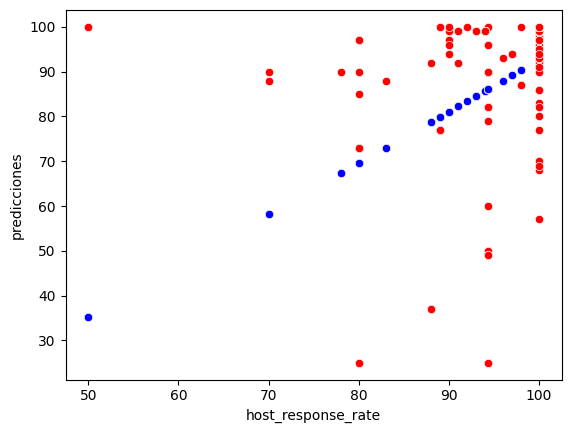

In [ ]:
#Visualizamod la gráfica comparativa entre el total real y el total del parecido

sns.scatterplot(x='host_response_rate', y='predicciones', color="blue", data=filtro3)
sns.scatterplot(x='host_response_rate', y='host_acceptance_rate', color="red", data=filtro3)
#sns.lineplot(x=alcohol', y='predicciones', color="red", data=df)

In [ ]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo (R cuadrada)
coef_Deter = model.score(Vars_indep, Vars_dep)
coef_Deter
#

0.15580944869064706

In [ ]:
#Corroboramos cual es el coeficinete de la correlación de nuestro modelo (R)
coef_Correl = np.sqrt(coef_Deter)
coef_Correl
#

0.39472705593947705

In [ ]:
#Declaramos las variables dependientes e independientes para la regresión lineal
#Vars_indep = df[['alcohol', 'speding']]
Vars_indep = filtro3[['price']]
Vars_dep = filtro3['host_acceptance_rate']

In [ ]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [ ]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [ ]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_indep, y=Vars_dep)
#Ya encontro la mejor ecuacion con la sumatoria del error cuadratico menor

LinearRegression()

In [ ]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__


{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['price'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.00264093]),
 'rank_': 1,
 'singular_': array([18505.06108664]),
 'intercept_': 84.23292314383623}

In [ ]:
#Predecimos los valores del total de accidentes a partir de la variable "alcohol"
#y_pred = model.predcit(X=df[['alcohol', 'speeding']])
y_pred = model.predict(X=filtro3[['price']])
y_pred
#Toma cada registro del alcohol y esta prediciendo el valor total de accidentes

array([ 88.13357847,  85.92311909,  84.95917921,  84.95917921,
        85.68543528,  84.76110938,  97.5352934 ,  85.15724905,
        85.00143411,  94.26846155,  86.65729795,  92.69974845,
        84.81920986,  86.65729795,  88.13357847,  84.89315593,
        84.89315593,  88.13357847,  84.75054565,  84.7716731 ,
        88.13357847,  89.31143377,  85.1017895 ,  88.13357847,
        88.13357847,  88.13357847,  85.81748184,  88.13357847,
        85.42134217,  85.32362771,  85.15724905,  84.76110938,
        88.13357847,  87.66613365,  88.13357847,  85.32362771,
        86.34302714,  85.13348067,  86.21362151,  88.13357847,
        92.15571663,  84.99879318,  85.04897087,  84.99879318,
        88.13357847,  84.92484711,  84.67131772,  85.42134217,
        84.92484711,  85.92576002,  85.02520249,  84.92484711,
        84.87466942,  84.91956525,  85.07273925,  88.13357847,
        88.13357847,  85.15724905,  88.13357847,  88.13357847,
        88.13357847,  84.8561829 ,  84.51022092,  84.54

In [ ]:
#Insertamos la columna de predicciones en el Dataframe
filtro3.insert(0, 'predicciones_1', y_pred)


<Axes: xlabel='price', ylabel='predicciones_1'>

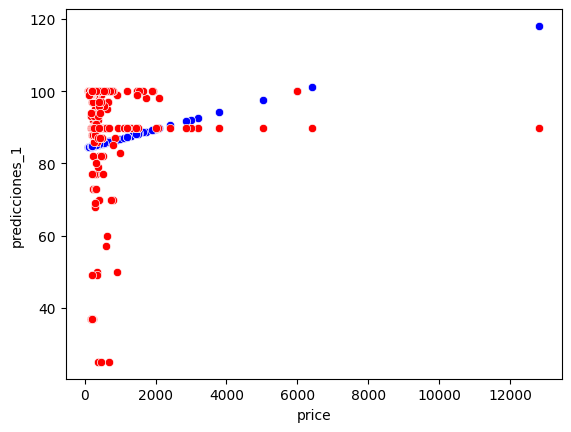

In [ ]:
#Visualizamod la gráfica comparativa entre el total real y el total del parecido

sns.scatterplot(x='price', y='predicciones_1', color="blue", data=filtro3)
sns.scatterplot(x='price', y='host_acceptance_rate', color="red", data=filtro3)
#sns.lineplot(x=alcohol', y='predicciones', color="red", data=df)

In [ ]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo (R cuadrada)
coef_Deter = model.score(Vars_indep, Vars_dep)
coef_Deter
#

0.012877505147893431

In [ ]:
#Corroboramos cual es el coeficinete de la correlación de nuestro modelo (R)
coef_Correl = np.sqrt(coef_Deter)
coef_Correl

0.11347909564273691

In [ ]:
#Declaramos las variables dependientes e independientes para la regresión lineal
#Vars_indep = df[['alcohol', 'speding']]
Vars_indep = filtro3[['number_of_reviews']]
Vars_dep = filtro3['host_acceptance_rate']

In [ ]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [ ]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [ ]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_indep, y=Vars_dep)
#Ya encontro la mejor ecuacion con la sumatoria del error cuadratico menor

LinearRegression()

In [ ]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__


{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['number_of_reviews'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.17390084]),
 'rank_': 1,
 'singular_': array([492.41902255]),
 'intercept_': 83.7820519589867}

In [ ]:
#Predecimos los valores del total de accidentes a partir de la variable "alcohol"
#y_pred = model.predcit(X=df[['alcohol', 'speeding']])
y_pred = model.predict(X=filtro3[['number_of_reviews']])
y_pred
#Toma cada registro del alcohol y esta prediciendo el valor total de accidentes

array([ 83.78205196,  83.78205196,  85.52106031,  89.17297786,
        98.56362297,  83.78205196,  83.78205196, 108.12816892,
       110.56278062,  83.78205196,  86.04276282,  83.78205196,
        84.12985363,  86.73836616,  83.78205196,  93.17269707,
        84.30375447,  83.78205196,  85.34715948,  90.04248203,
        83.78205196,  86.56446533,  83.95595279,  83.78205196,
        83.95595279,  83.78205196,  84.99935781,  83.78205196,
        85.86886198,  85.17325864,  83.78205196,  83.95595279,
        83.78205196,  83.78205196,  83.78205196,  85.69496115,
        86.04276282, 101.86773884,  85.17325864,  85.34715948,
        83.78205196,  87.60787034,  98.04192046,  99.25922631,
       104.30235054,  89.69468036,  84.65155614,  84.12985363,
       102.38944135,  93.52049874, 101.51993717,  88.30347368,
        87.60787034, 108.47597059,  84.65155614,  90.39028371,
        83.78205196,  84.65155614,  83.78205196,  83.78205196,
        83.78205196,  83.78205196,  87.08616783,  87.60

In [ ]:
#Insertamos la columna de predicciones en el Dataframe
filtro3.insert(0, 'predicciones_2', y_pred)


<Axes: xlabel='number_of_reviews', ylabel='predicciones_2'>

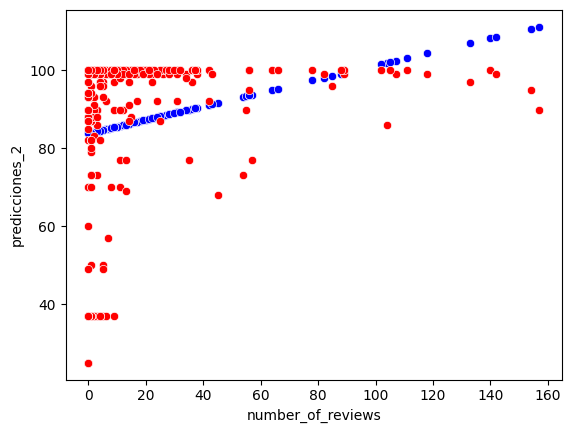

In [ ]:
#Visualizamod la gráfica comparativa entre el total real y el total del parecido

sns.scatterplot(x='number_of_reviews', y='predicciones_2', color="blue", data=filtro3)
sns.scatterplot(x='number_of_reviews', y='host_acceptance_rate', color="red", data=filtro3)
#sns.lineplot(x=alcohol', y='predicciones', color="red", data=df)

In [ ]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo (R cuadrada)
coef_Deter = model.score(Vars_indep, Vars_dep)
coef_Deter
#

0.039537527263605154

In [ ]:
#Corroboramos cual es el coeficinete de la correlación de nuestro modelo (R)
coef_Correl = np.sqrt(coef_Deter)
coef_Correl
#

0.19884045680797746

In [ ]:
#Declaramos las variables dependientes e independientes para la regresión lineal
#Vars_indep = df[['alcohol', 'speding']]
Vars_indep = filtro3[['review_scores_cleanliness']]
Vars_dep = filtro3['review_scores_location']

In [ ]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [ ]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [ ]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_indep, y=Vars_dep)
#Ya encontro la mejor ecuacion con la sumatoria del error cuadratico menor

LinearRegression()

In [ ]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__


{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['review_scores_cleanliness'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.21174373]),
 'rank_': 1,
 'singular_': array([4.71027481]),
 'intercept_': 3.8389617316990687}

In [ ]:
#Predecimos los valores del total de accidentes a partir de la variable "alcohol"
#y_pred = model.predcit(X=df[['alcohol', 'speeding']])
y_pred = model.predict(X=filtro3[['review_scores_cleanliness']])
y_pred
#Toma cada registro del alcohol y esta prediciendo el valor total de accidentes

array([4.85533164, 4.85533164, 4.83415727, 4.80239571, 4.88285833,
       4.85533164, 4.85533164, 4.81933521, 4.79180852, 4.85533164,
       4.88074089, 4.85533164, 4.79180852, 4.83627471, 4.85533164,
       4.85533164, 4.75581209, 4.85533164, 4.82780496, 4.82145265,
       4.85533164, 4.89768039, 4.89768039, 4.85533164, 4.89768039,
       4.85533164, 4.86803627, 4.85533164, 4.84474446, 4.87227114,
       4.85533164, 4.89768039, 4.85533164, 4.85533164, 4.85533164,
       4.82145265, 4.89768039, 4.79392596, 4.84474446, 4.7791039 ,
       4.85533164, 4.73463772, 4.75792953, 4.78757365, 4.74945978,
       4.69228897, 4.64358791, 4.89768039, 4.77698646, 4.84897933,
       4.85956652, 4.83203983, 4.79180852, 4.83839214, 4.85533164,
       4.70287616, 4.85533164, 4.68593666, 4.85533164, 4.85533164,
       4.85533164, 4.85533164, 4.69652384, 4.81086546, 4.76004696,
       4.85533164, 4.82992239, 4.70499359, 4.85533164, 4.7791039 ,
       4.89768039, 4.77275159, 4.84474446, 4.85533164, 4.85533

In [ ]:
#Insertamos la columna de predicciones en el Dataframe
filtro3.insert(0, 'predicciones_3', y_pred)

#

<Axes: xlabel='review_scores_cleanliness', ylabel='review_scores_location'>

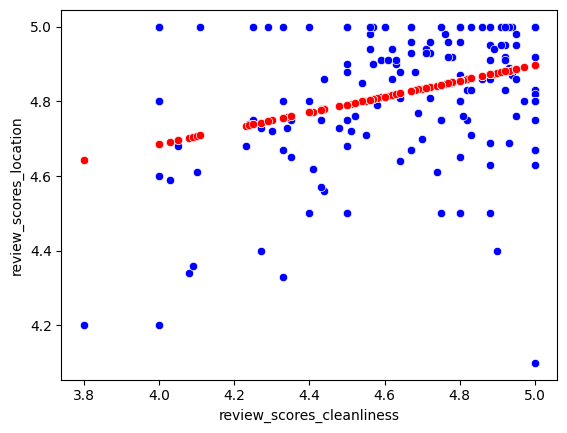

In [ ]:
#Visualizamod la gráfica comparativa entre el total real y el total del parecido

sns.scatterplot(x='review_scores_cleanliness', y='review_scores_location', color="blue", data=filtro3)
sns.scatterplot(x='review_scores_cleanliness', y='predicciones_3', color="red", data=filtro3)
#sns.lineplot(x=alcohol', y='predicciones', color="red", data=df)

In [ ]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo (R cuadrada)
coef_Deter = model.score(Vars_indep, Vars_dep)
coef_Deter
#

0.12236914027935941

In [ ]:
#Corroboramos cual es el coeficinete de la correlación de nuestro modelo (R)
coef_Correl = np.sqrt(coef_Deter)
coef_Correl
#

0.34981300759028305

In [ ]:
#Declaramos las variables dependientes e independientes para la regresión lineal
#Vars_indep = df[['alcohol', 'speding']]
Vars_indep = filtro3[['number_of_reviews']]
Vars_dep = filtro3['availability_365']

In [ ]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [ ]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [ ]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_indep, y=Vars_dep)
#Ya encontro la mejor ecuacion con la sumatoria del error cuadratico menor

LinearRegression()

In [ ]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__


{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['number_of_reviews'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-0.07157915]),
 'rank_': 1,
 'singular_': array([492.41902255]),
 'intercept_': 264.75445301667617}

In [ ]:
#Predecimos los valores del total de accidentes a partir de la variable "alcohol"
#y_pred = model.predcit(X=df[['alcohol', 'speeding']])
y_pred = model.predict(X=filtro3[['number_of_reviews']])
y_pred
#Toma cada registro del alcohol y esta prediciendo el valor total de accidentes

array([264.75445302, 264.75445302, 264.03866149, 262.5354993 ,
       258.67022508, 264.75445302, 264.75445302, 254.73337171,
       253.73126358, 264.75445302, 263.82392404, 264.75445302,
       264.61129471, 263.53760743, 264.75445302, 260.8891788 ,
       264.53971556, 264.75445302, 264.11024065, 262.17760354,
       264.75445302, 263.60918658, 264.68287386, 264.75445302,
       264.68287386, 264.75445302, 264.25339895, 264.75445302,
       263.89550319, 264.1818198 , 264.75445302, 264.68287386,
       264.75445302, 264.75445302, 264.75445302, 263.96708234,
       263.82392404, 257.31022119, 264.1818198 , 264.11024065,
       264.75445302, 263.17971167, 258.88496254, 258.38390847,
       256.30811306, 262.32076184, 264.39655726, 264.61129471,
       257.09548373, 260.7460205 , 257.4533795 , 262.89339506,
       263.17971167, 254.59021341, 264.39655726, 262.03444523,
       264.75445302, 264.39655726, 264.75445302, 264.75445302,
       264.75445302, 264.75445302, 263.39444913, 263.17

In [ ]:
#Insertamos la columna de predicciones en el Dataframe
filtro3.insert(0, 'predicciones_5', y_pred)

#

<Axes: xlabel='number_of_reviews', ylabel='availability_365'>

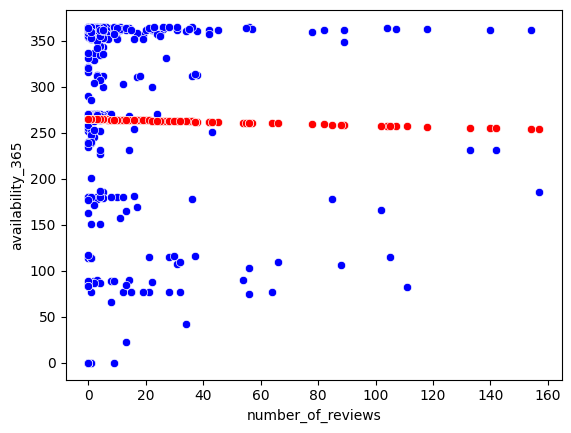

In [ ]:
#Visualizamod la gráfica comparativa entre el total real y el total del parecido

sns.scatterplot(x='number_of_reviews', y='availability_365', color="blue", data=filtro3)
sns.scatterplot(x='number_of_reviews', y='predicciones_5', color="red", data=filtro3)
#sns.lineplot(x=alcohol', y='predicciones', color="red", data=df)

In [ ]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo (R cuadrada)
coef_Deter = model.score(Vars_indep, Vars_dep)
coef_Deter
#

0.00024101962581912773

In [ ]:
#Corroboramos cual es el coeficinete de la correlación de nuestro modelo (R)
coef_Correl = np.sqrt(coef_Deter)
coef_Correl
#

0.015524806788463673

In [ ]:
#Declaramos las variables dependientes e independientes para la regresión lineal
#Vars_indep = df[['alcohol', 'speding']]
Vars_indep = filtro3[['review_scores_communication']]
Vars_dep = filtro3['reviews_per_month']

In [ ]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [ ]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [ ]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_indep, y=Vars_dep)
#Ya encontro la mejor ecuacion con la sumatoria del error cuadratico menor

LinearRegression()

In [ ]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__


{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['review_scores_communication'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-0.22743301]),
 'rank_': 1,
 'singular_': array([3.80801694]),
 'intercept_': 2.263939385559669}

In [ ]:
#Predecimos los valores del total de accidentes a partir de la variable "alcohol"
#y_pred = model.predcit(X=df[['alcohol', 'speeding']])
y_pred = model.predict(X=filtro3[['review_scores_communication']])
y_pred
#Toma cada registro del alcohol y esta prediciendo el valor total de accidentes

array([1.17226094, 1.17226094, 1.12677434, 1.18590692, 1.14724331,
       1.17226094, 1.17226094, 1.14724331, 1.19727857, 1.17226094,
       1.14496898, 1.17226094, 1.24049084, 1.1540663 , 1.17226094,
       1.17908393, 1.27915445, 1.17226094, 1.22684486, 1.18363259,
       1.17226094, 1.14042032, 1.12677434, 1.17226094, 1.12677434,
       1.17226094, 1.15861496, 1.17226094, 1.24049084, 1.1540663 ,
       1.17226094, 1.12677434, 1.17226094, 1.17226094, 1.17226094,
       1.22911919, 1.12677434, 1.1995529 , 1.12677434, 1.22684486,
       1.17226094, 1.22002187, 1.21319888, 1.22457053, 1.20182723,
       1.22684486, 1.35420735, 1.12677434, 1.18135826, 1.13587166,
       1.19727857, 1.16998661, 1.18818125, 1.1995529 , 1.21774754,
       1.27005713, 1.17226094, 1.30872074, 1.17226094, 1.17226094,
       1.17226094, 1.17226094, 1.21092455, 1.16771228, 1.2222962 ,
       1.17226094, 1.1995529 , 1.27233146, 1.17226094, 1.16543795,
       1.12677434, 1.27233146, 1.12677434, 1.37012766, 1.17226

In [ ]:
#Insertamos la columna de predicciones en el Dataframe
filtro3.insert(0, 'predicciones_6', y_pred)

#

<Axes: xlabel='review_scores_communication', ylabel='reviews_per_month'>

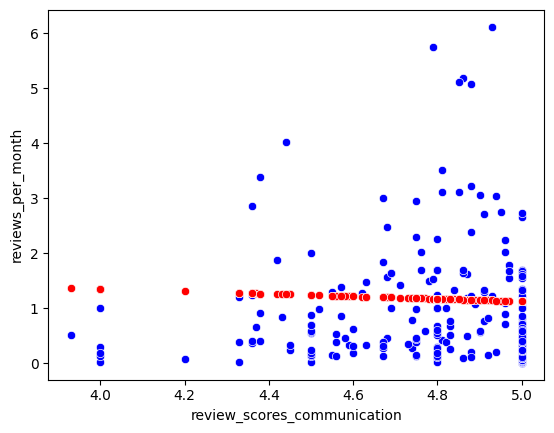

In [ ]:
#Visualizamod la gráfica comparativa entre el total real y el total del parecido

sns.scatterplot(x='review_scores_communication', y='reviews_per_month', color="blue", data=filtro3)
sns.scatterplot(x='review_scores_communication', y='predicciones_6', color="red", data=filtro3)
#sns.lineplot(x=alcohol', y='predicciones', color="red", data=df)

In [ ]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo (R cuadrada)
coef_Deter = model.score(Vars_indep, Vars_dep)
coef_Deter
#

0.0022162606755716796

In [ ]:
#Corroboramos cual es el coeficinete de la correlación de nuestro modelo (R)
coef_Correl = np.sqrt(coef_Deter)
coef_Correl
#

0.04707717786328827